# Data Cleaning

- Objective
    1. Take input image
    2. Detect Face & Eyes
    3. If Face & Eyes are present crop image

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import os
import shutil

In [2]:
# Load Image
test_img = cv2.imread('./testdata/test.jpg')
test_img.shape

(192, 192, 3)

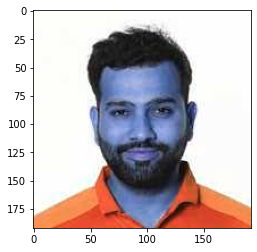

In [3]:
# Display Image
plt.imshow(test_img)

In [4]:
# Convert Image in to Gray shade
gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
gray_img.shape

(192, 192)

In [5]:
#Image combination of 192*192 pixels display as matrix
gray_img

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [140, 140, 139, ...,  98, 108, 116],
       [140, 140, 139, ...,  90,  94,  98],
       [140, 140, 139, ...,  93,  92,  93]], dtype=uint8)

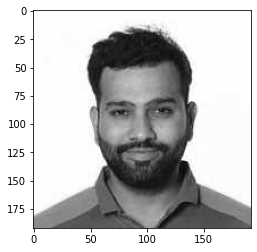

In [6]:
# Display Gray Image
plt.imshow(gray_img, cmap='gray')

## Face & Eye Detection

In [7]:
# Import haarcascade XMLs for face and eye detection
face_har = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_har = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')


faces = face_har.detectMultiScale(gray_img, 1.3, 5)
faces

array([[ 42,  45, 109, 109]], dtype=int32)

In [8]:
# Face co-ordinates
(x,y,w,h) = faces[0]
x,y,w,h

(42, 45, 109, 109)

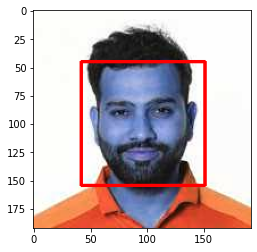

In [9]:
# Plot Square againt Face
face_img = cv2.rectangle(test_img, (x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

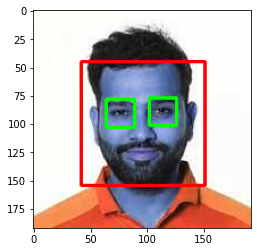

In [10]:
# Face and Eye Detection
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(test_img, (x,y), (x+w,y+h), (255,0,0), 2)
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_har.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0), 2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

## Crop Image

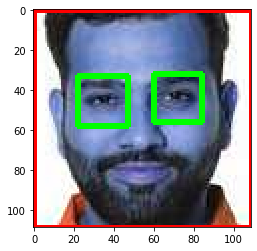

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [30]:
## Function to get cropped image

def get_cropped_image(image_path):
    print(image_path)
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_har.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_har.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

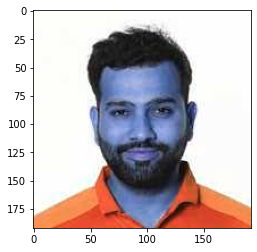

In [13]:
original_image = cv2.imread('./testdata/test.jpg')
plt.imshow(original_image)

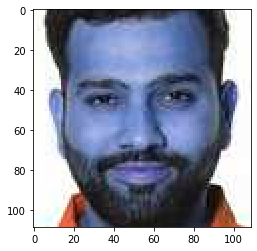

In [14]:
# call function to get crop image
cropped_image = get_cropped_image('./testdata/test.jpg')
plt.imshow(cropped_image)

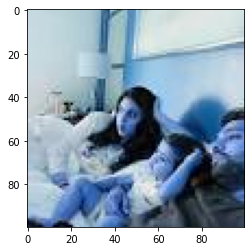

In [15]:
# Load Different image
org_image_obstructed = cv2.imread('./testdata/test2.jpg')
plt.imshow(org_image_obstructed)

In [16]:
# It will not return image as it does not detect face and eye
cropped_image_no_2_eyes = get_cropped_image('./testdata/test2.jpg')
cropped_image_no_2_eyes

# Data Cleaning Process

In [36]:
# Input data directory
input_img_path = "./dataset/"
output_crop_path = "./dataset/cropped/"

In [37]:
#find image directory
def findImgDirectory(input_img_path):
    img_dirs = []
    for entry in os.scandir(input_img_path):
        if entry.is_dir():
            img_dirs.append(entry.path)
    return img_dirs

In [38]:
img_dirs = findImgDirectory(input_img_path)
img_dirs

['./dataset/dinesh_karthik',
 './dataset/david_warner',
 './dataset/virat_kohli',
 './dataset/ms_dhoni',
 './dataset/cropped',
 './dataset/shreyas_iyer']

In [39]:
# create folder structure to store cropped Images

if os.path.exists(output_crop_path):
     shutil.rmtree(output_crop_path)
os.mkdir(output_crop_path)

In [40]:
cropped_image_dirs = []
captain_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    captain_name = img_dir.split('/')[-1]
    print(captain_name)
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = output_crop_path + captain_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = captain_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            #captain_file_names_dict[captain_name].append(cropped_file_path)
            count += 1

dinesh_karthik
./dataset/dinesh_karthik/images (52).jpg
./dataset/dinesh_karthik/images (1).jpg
./dataset/dinesh_karthik/images (44).jpg
./dataset/dinesh_karthik/Z (2).jpg
./dataset/dinesh_karthik/images (13).jpg
./dataset/dinesh_karthik/images (87).jpg
./dataset/dinesh_karthik/2Q__ (6).jpg
./dataset/dinesh_karthik/images (68).jpg
./dataset/dinesh_karthik/images (29).jpg
./dataset/dinesh_karthik/images (91).jpg
./dataset/dinesh_karthik/images (48).jpg
./dataset/dinesh_karthik/images (64).jpg
./dataset/dinesh_karthik/images (33).jpg
./dataset/dinesh_karthik/images (25).jpg
Generating cropped images in folder:  ./dataset/cropped/dinesh_karthik
./dataset/dinesh_karthik/images (72).jpg
./dataset/dinesh_karthik/2Q__ (10).jpg
./dataset/dinesh_karthik/Z.jpg
./dataset/dinesh_karthik/images (73).jpg
./dataset/dinesh_karthik/2Q__ (11).jpg
./dataset/dinesh_karthik/images (24).jpg
./dataset/dinesh_karthik/images (32).jpg
./dataset/dinesh_karthik/images (65).jpg
./dataset/dinesh_karthik/images (49)

./dataset/virat_kohli/images (29).jpg
./dataset/virat_kohli/images (33).jpg
./dataset/virat_kohli/images (25).jpg
./dataset/virat_kohli/Z.jpg
./dataset/virat_kohli/images (24).jpg
./dataset/virat_kohli/images (32).jpg
Generating cropped images in folder:  ./dataset/cropped/virat_kohli
./dataset/virat_kohli/images (28).jpg
./dataset/virat_kohli/images (12).jpg
./dataset/virat_kohli/9k_.jpg
./dataset/virat_kohli/Z (3).jpg
./dataset/virat_kohli/9k_ (1).jpg
./dataset/virat_kohli/9k_ (10).jpg
./dataset/virat_kohli/images (19).jpg
./dataset/virat_kohli/Z (8).jpg
./dataset/virat_kohli/images (23).jpg
./dataset/virat_kohli/9k_ (6).jpg
./dataset/virat_kohli/images (7).jpg
./dataset/virat_kohli/2Q__.jpg
./dataset/virat_kohli/Z (4).jpg
./dataset/virat_kohli/images (15).jpg
./dataset/virat_kohli/2Q__ (1).jpg
./dataset/virat_kohli/images (14).jpg
./dataset/virat_kohli/Z (5).jpg
./dataset/virat_kohli/9k_ (7).jpg
./dataset/virat_kohli/images (6).jpg
./dataset/virat_kohli/images (22).jpg
./dataset/vir

error: OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-p8djv5ll/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
